In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import polars as pl

In [2]:
# !pip install matplotlib
# !pip install polars
# !pip install pandas
# !pip install pyarrow
# !pip install fastparquet

In [3]:
start = time.time()
df = pd.read_json("arxiv.json", lines=True)
end = time.time()

print(f"time to read in pandas json: {end - start}s")

time to read in pandas json: 32.41287541389465s


In [4]:
start = time.time()
pl_df_parquet = pl.read_parquet("arxiv.parquet")
end = time.time()

print(f"time to read in  polars parquet not cleaned: {end - start}s")

time to read in  polars parquet not cleaned: 5.469616413116455s


In [5]:
start = time.time()
pd_df_parquet = pd.read_parquet("arxiv.parquet")
end = time.time()

print(f"time to read in pandas not cleaned: {end - start}s")

time to read in pandas not cleaned: 20.884845972061157s


In [6]:
start = time.time()
pd_df = pd.read_parquet("arxiv_cleaned.parquet")
end = time.time()

print(f"time to read in pandas parquet cleaned: {end - start}s")

time to read in pandas parquet cleaned: 0.09770607948303223s


In [7]:
start = time.time()
pl_df = pl.read_parquet("arxiv_cleaned.parquet")
end = time.time()

print(f"time to read in polars parquet cleaned: {end - start}s")

time to read in polars parquet cleaned: 0.10733175277709961s


# Algumas visuallizações iniciais

In [7]:
pd_df = pd.read_parquet("arxiv_cleaned.parquet")
pd_df

,id,submitter,title,comments,journal-ref,doi,report-no,categories,license,update_date,...,INTJ,NOUN,PROPN,VERB,lexical_diversity,legibility,number_of_authors,number_of_sentences,number_of_words,version_count
index,,,,,,,,,,,,,,,,,,,,,
7,0704.0008,Damian Swift,Numerical solution of shock and ramp compressi...,Minor corrections,"Journal of Applied Physics, vol 104, 073536 (2...",10.1063/1.2975338,"LA-UR-07-2051, LLNL-JRNL-410358",cond-mat.mtrl-sci,http://arxiv.org/licenses/nonexclusive-distrib...,2009-02-05,...,0,52,0,16,0.610738,15.51,15,6,149,3
376,0704.0377,Vladimir Pascalutsa,The lifetime of unstable particles in electrom...,"11 pages, 3 figs; published version","J.Phys.G36:045001,2009",10.1088/0954-3899/36/4/045001,ECT*-07-08,hep-ph hep-th nucl-th,http://arxiv.org/licenses/nonexclusive-distrib...,2009-09-01,...,0,40,5,11,0.537975,48.43,78,5,158,3
629,0704.0630,Evgeni Solodov P,"The $e^+ e^-\to K^+ K^- \pi^+\pi^-$, $K^+ K^- ...","32 pages, 46 postscript figures, submitted to ...","Phys.Rev.D76:012008,2007",10.1103/PhysRevD.76.012008,"BABAR-PUB-07/021, SLAC-PUB-12435",hep-ex,http://arxiv.org/licenses/nonexclusive-distrib...,2010-04-12,...,0,49,16,22,0.544601,57.00,41,8,213,3
928,0704.0929,Hyun Seok Yang,Noncommutative Electromagnetism As A Large N G...,"25 pages; More clarifications, to appear in Eu...","Eur.Phys.J.C64:445-457,2009",10.1140/epjc/s10052-009-1117-9,HU-EP-07/12,hep-th gr-qc hep-ph,http://arxiv.org/licenses/nonexclusive-distrib...,2009-11-05,...,0,32,31,11,0.518519,27.35,14,7,162,3
944,0704.0945,Peter McCullagh,Gibbs fragmentation trees,Published in at http://dx.doi.org/10.3150/08-B...,"Bernoulli 2008, Vol. 14, No. 4, 988-1002",10.3150/08-BEJ134,IMS-BEJ-BEJ134,math.PR math.ST stat.TH,http://arxiv.org/licenses/nonexclusive-distrib...,2008-11-14,...,0,26,14,6,0.598131,27.15,44,3,107,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448435,quant-ph/0607216,Arleta Szkola,The Chernoff lower bound for symmetric quantum...,Published in at http://dx.doi.org/10.1214/08-A...,"Annals of Statistics 2009, Vol. 37, No. 2, 104...",10.1214/08-AOS593,IMS-AOS-AOS593,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,2009-04-30,...,0,32,6,14,0.598540,36.59,34,8,137,2
2449969,quant-ph/0701245,Mark A. Rubin,Signal-to-Noise Ratio in Squeezed-Light Laser ...,Typos corrected,"Appl. Opt. 48, 4597-4609 (2009)",10.1364/AO.48.004597,WW-13038,quant-ph,http://arxiv.org/licenses/nonexclusive-distrib...,2009-08-12,...,0,36,5,12,0.517544,42.92,30,5,114,4
2450064,quant-ph/0702094,Owen Maroney,Generalising Landauer's Principle,"29 pages, 4 figures. v4 Major changes to therm...","PHYSICAL REVIEW E 79, 031105 (2009)",10.1103/PhysRevE.79.031105,pi-foundqt-41,quant-ph cond-mat.stat-mech,http://arxiv.org/licenses/nonexclusive-distrib...,2009-11-30,...,0,32,5,18,0.566038,13.99,16,6,159,3


In [20]:
valores_medios = pd_df[["INTJ","NOUN","PROPN","VERB","lexical_diversity","legibility","number_of_authors","number_of_sentences","number_of_words","version_count"]].mean()
valores_maximos = pd_df[["INTJ","NOUN","PROPN","VERB","lexical_diversity","legibility","number_of_authors","number_of_sentences","number_of_words","version_count"]].max()
valores_minimos = pd_df[["INTJ","NOUN","PROPN","VERB","lexical_diversity","legibility","number_of_authors","number_of_sentences","number_of_words","version_count"]].min()

<Axes: >

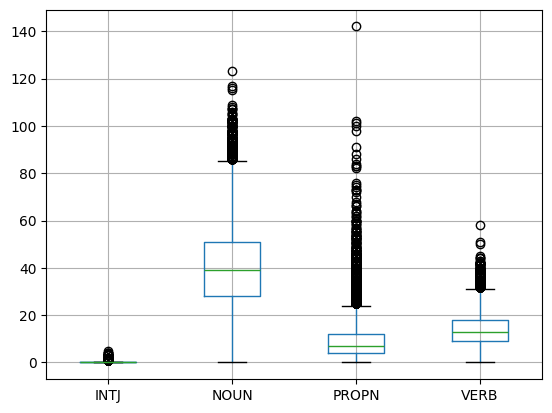

In [23]:
pd_df[["INTJ","NOUN","PROPN","VERB"]].boxplot()

<Axes: >

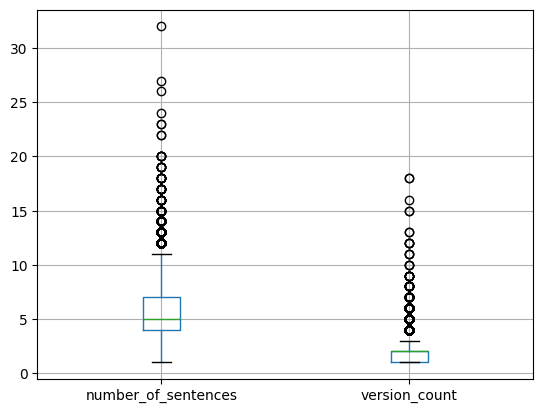

In [30]:
pd_df[["number_of_sentences","version_count"]].boxplot()

<Axes: >

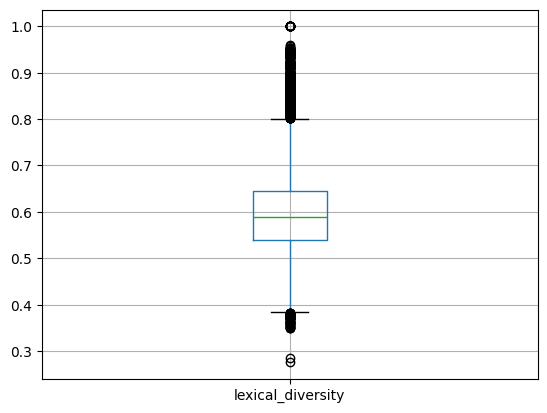

In [27]:
pd_df[["lexical_diversity"]].boxplot()

<Axes: >

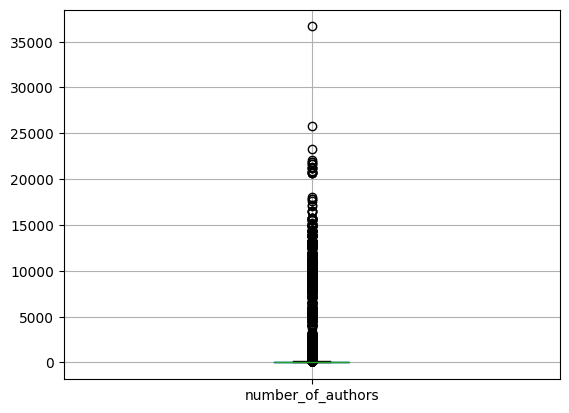

In [28]:
pd_df[["number_of_authors"]].boxplot()

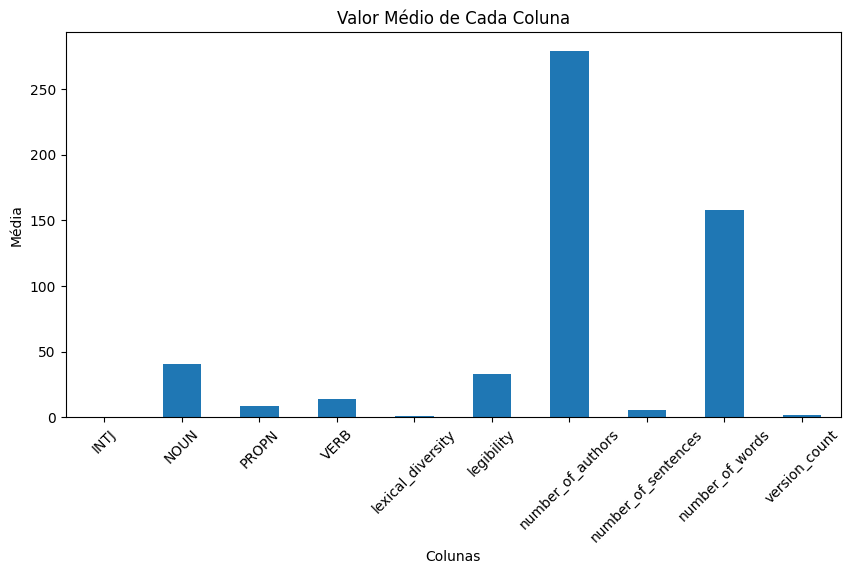

In [18]:
plt.figure(figsize=(10, 5))
valores_medios.plot(kind='bar')
plt.title('Valor Médio de Cada Coluna')
plt.xlabel('Colunas')
plt.xticks(rotation=45)
plt.show()

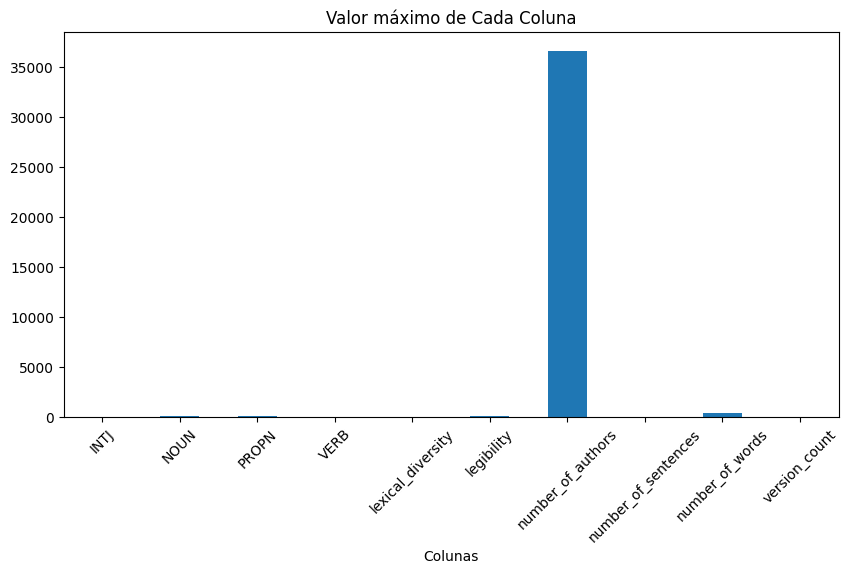

In [21]:
plt.figure(figsize=(10, 5))
valores_maximos.plot(kind='bar')
plt.title('Valor máximo de Cada Coluna')
plt.xlabel('Colunas')
plt.xticks(rotation=45)
plt.show()

In [11]:
pl_df = pl.read_parquet("arxiv_cleaned.parquet")

In [31]:
import requests
import tqdm
import concurrent.futures
import multiprocessing

def get_cited_references(doi):
    url = f"https://api.crossref.org/works/{doi}"
    response = requests.get(url)
    data = response.json()
    
    if response.status_code == 200 and 'reference' in data['message']:
        references = data['message']['reference']
        cited_dois = []
        
        for reference in references:
            cited_doi = reference.get('DOI')
            
            if cited_doi:
                cited_dois.append(cited_doi)
            
        return doi, cited_dois  # Return the doi along with the cited_dois
    else:
        return doi, None


manager = multiprocessing.Manager()
cited_dois_dict = manager.dict()

# Get the number of cores
num_cores = multiprocessing.cpu_count()

dois = [row[6] for row in pl_df.rows()]


with concurrent.futures.ThreadPoolExecutor(max_workers=num_cores) as executor:
    for doi, cited_dois in tqdm.tqdm(executor.map(get_cited_references, dois)):
        cited_dois_dict[doi] = cited_dois


286it [00:20, 14.03it/s]


KeyboardInterrupt: 

In [ ]:
cited_dois_dict